# Title
## name
date

instructor 

blog

student pace

## Business Understanding 

## Data Distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

webiste used to create [maps](https://www.mapchart.net/usa.html)

In [2]:
df = pd.read_csv('telecom_data.zip')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.drop(columns = ['phone number'], axis = 1, inplace = True)

---
## Dataset Metadata

- state: The state of the customer.
- account length: The length of the account in days.
- area code: The area code of the customer's phone number.
- phone number: The phone number of the customer.
- international plan: Whether the customer has an international plan or not.
- voice mail plan: Whether the customer has a voicemail plan or not.
- number vmail messages: The number of voicemail messages the customer has.
- total day minutes: Total minutes of day calls.
- total day calls: Total number of day calls.
- total day charge: Total charge for the day calls.
- total eve minutes: Total minutes of evening calls.
- total eve calls: Total number of evening calls.
- total eve charge: Total charge for the evening calls.
- total night minutes: Total minutes of night calls.
- total night calls: Total number of night calls.
- total night charge: Total charge for the night calls.
- total intl minutes: Total minutes of international calls.
- total intl calls: Total number of international calls.
- total intl charge: Total charge for the international calls.
- customer service calls: Number of times the customer called customer service.
- churn: Whether the customer churned or not (True/False).
    - churn (True): customer has canceled their business with the company
---

Let's take a quick glance at how many customers are churning 

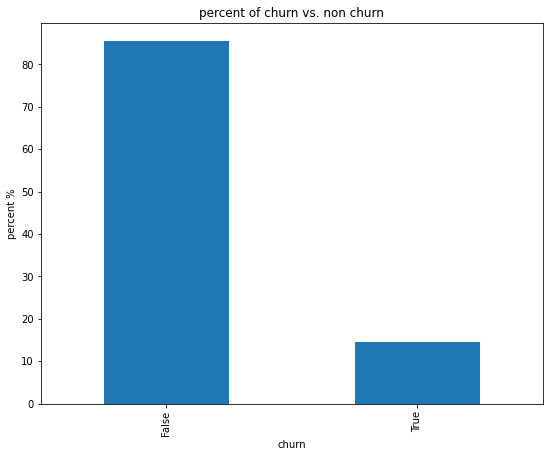

In [5]:
fig, ax = plt.subplots(figsize = (9,7))
churn_bar = df['churn'].value_counts(normalize=True) * 100
churn_bar.plot(kind='bar')
ax.set_ylabel('percent %')
ax.set_title('percent of churn vs. non churn')
plt.show();

In [6]:
round(len(df[df['churn'] == False]) / len(df) * 100, 2)

85.51

Above we can see that approximately 85.5 % of customers dont churn, meaning only about 14.48 % do. While this is a decently low rate, we can attempt to reduce this as little as possible to maximize revenue and customer retention.

Let's look into the data we have and determine which ones are categorical and which ones are continuous.
Categorical data is any data pretaining to a category, e.g. true/false or red/blue. Categorical is always one thing or another.
Whereas continuous data is data that can be infinate in scope e.g. 1.5, 16.3333333 and so on. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

- categorical data:
    - state
    - area code
    - international plan
    - voicemail plan
- continuous / numeric data:
    - everything else

## Metrics

## Overview

## Data Cleaning / Data Formating

In [8]:
df['international plan'] = df['international plan'].replace({'yes' : 1, 'no' : 0})
df['voice mail plan'] = df['voice mail plan'].replace({'yes' : 1, 'no' : 0})
df['churn'] = df['churn'].replace({True : 1, False : 0})
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Data Manipulation
### Define

In [9]:
def area_percent(df, area_code):
    df = df
    area = df[df['area code'] == area_code]
    count = len(area)
    area_churn = area[area['churn'] == True]
    c_count = len(area_churn)
    percent = round((c_count / count) * 100, 2)
    no_churn = len(area) - c_count
    
    if area_code == 415:
        a_c = 'San Fransisco'
    elif area_code == 510:
        a_c = 'Oakland'
    else:
        a_c = 'San Jose'
    
    return 'out of {} cutomers in the {} area code ({}), {} ({}%) have churned, {} have not'.format(count, area_code, 
                                                                                                    a_c, c_count, 
                                                                                                    percent, no_churn)

In [10]:
def inter_percent(df, bool_):
    df = df
    inter_plan = df[df['international plan'] == bool_]
    inter_count = len(inter_plan)
    inter_churn = inter_plan[inter_plan['churn'] == 1]
    churn_count = len(inter_churn)
    percent = round((churn_count / inter_count) * 100, 2)
    
    if bool_ == 1:
        churn_bool = 'do have an international plan'
    else:
        churn_bool = 'do not have an international plan'
   
    return 'out of {} that {}, {} ({}%) churned'.format(inter_count, churn_bool, 
                                                        churn_count, percent) 

In [11]:
def voice_percent(df, bool_):
    df = df
    voice_plan = df[df['voice mail plan'] == bool_]
    voice_count = len(voice_plan)
    voice_churn = voice_plan[voice_plan['churn'] == 1]
    churn_count = len(voice_churn)
    percent = round((churn_count / voice_count) * 100, 2)
    
    if bool_ == 1:
        churn_bool = 'do have a voice mail plan'
    else:
        churn_bool = 'do not have a voice mail plan'
   
    return 'out of {} that {}, {} ({}%) churned'.format(voice_count, churn_bool, 
                                                        churn_count, percent) 

In [12]:
def get_avgs(col):
    data = df[col]
    avg = data.mean()
    max_ = data.max()
    min_ = data.min()
    
    return '{} is the average amount of {}, with {} being the minimum and {} being the maximum'.format(round(avg, 2), col, 
                                                                                                       min_, max_)

## Exploratory Data Analysis

## State Categorical

Let's take a look into the state categorical data so see how many people churned related to this data.

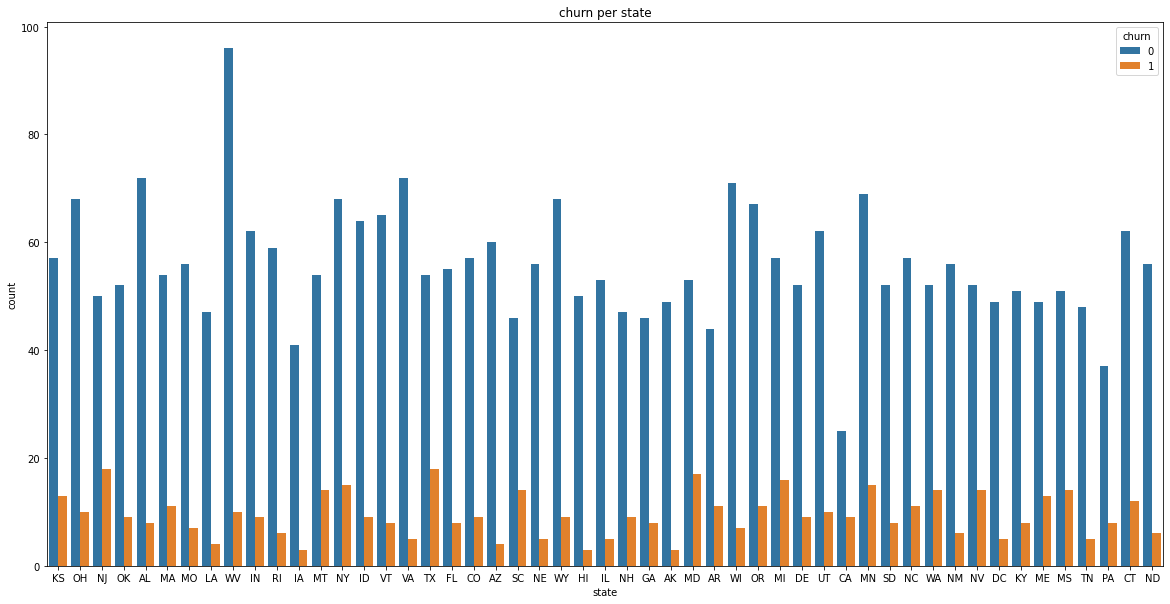

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = df, x = 'state', hue = 'churn')
ax.set_title('churn per state')
plt.show();

Here we see all the states with their corresponding churn counts. This graph may be a little to much to grasp all at once, so lets look into the top 10 states with the most churn and the top 10 with the least.

In [14]:
df_churn = df[df['churn'] == True].copy()
df_churn.drop(columns = ['international plan', 'voice mail plan'], axis = 1, inplace = True)
churn_top_10 = df_churn.sort_values(by = 'churn').groupby('state').sum()
churn_top_10.sort_values('churn', ascending = False)[:10]

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,
NJ,1708,8093,159,4166.7,1834,708.33,3799.8,1881,323.00,3847.4,1795,173.14,194.3,78,52.49,39,18
TX,1881,8019,57,3895.9,1771,662.31,3859.3,1763,328.06,3879.5,1790,174.58,198.2,85,53.53,30,18
MD,1911,7386,83,3913.4,1664,665.30,3656.2,1716,310.78,3333.4,1484,149.99,193.8,61,52.32,38,17
MI,1908,6686,54,3162.6,1696,537.66,3332.8,1649,283.28,3085.9,1639,138.89,188.0,72,50.76,39,16
MN,1587,6883,82,3124.1,1501,531.12,3210.1,1564,272.87,3002.5,1421,135.12,169.6,49,45.79,41,15
NY,1833,6292,33,2960.7,1413,503.31,2858.5,1448,242.97,2874.1,1566,129.34,171.9,68,46.42,40,15
MT,1474,5965,117,2504.7,1241,425.81,2905.7,1387,246.98,2766.0,1479,124.45,152.5,61,41.20,36,14
NV,1277,6081,90,3016.1,1440,512.75,2998.9,1307,254.90,2799.5,1425,125.97,134.1,47,36.19,30,14
MS,1249,5965,84,2753.3,1573,468.06,2816.0,1453,239.37,3108.0,1446,139.86,142.9,65,38.60,32,14


Below we see a map with the top 10 states with the most churns. A majority of these states are located in the east / south east, with only 2 states within the general west region.

<div>
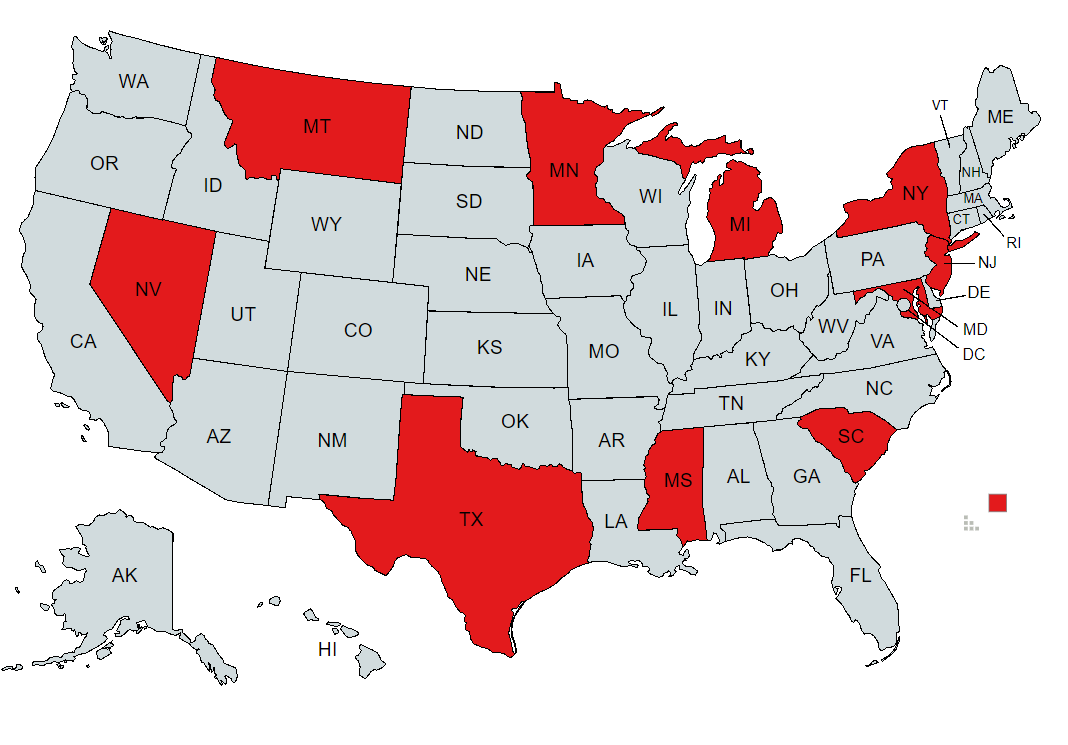
</div>

In [15]:
df_low_churn = df[df['churn'] == True].copy()
churn_top_10_low = df_churn.sort_values(by = 'churn').groupby('state').sum()
churn_top_10_low.sort_values('churn', ascending = True)[:10]

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,
AK,414,1245,0,479.7,270,81.55,494.1,299,42.00,487.5,282,21.95,31.1,6,8.39,10,3
IA,165,1435,0,739.7,395,125.75,507.9,319,43.17,723.5,277,32.56,25.8,12,6.97,9,3
HI,312,1238,0,708.6,330,120.46,731.0,292,62.13,641.0,314,28.84,31.5,15,8.51,9,3
AZ,300,1843,0,800.7,436,136.12,829.0,438,70.46,908.1,409,40.87,40.2,18,10.86,9,4
LA,538,1755,27,650.2,417,110.53,852.2,388,72.44,768.7,385,34.59,41.2,12,11.12,9,4
NE,518,2068,0,1159.3,494,197.09,1115.7,579,94.83,1170.5,550,52.68,58.4,19,15.77,6,5
VA,417,2156,42,914.9,578,155.54,1235.2,503,105.00,1214.7,453,54.66,58.9,25,15.91,8,5
TN,437,2258,65,1044.1,511,177.51,949.4,447,80.70,1044.1,439,46.98,57.0,14,15.39,15,5
DC,346,2061,0,943.0,539,160.31,911.9,449,77.53,1224.5,464,55.11,53.4,21,14.42,9,5


Now we have a map including the states with the lowest churns (in green) with a mojority of states residing within the central america area.

<div>
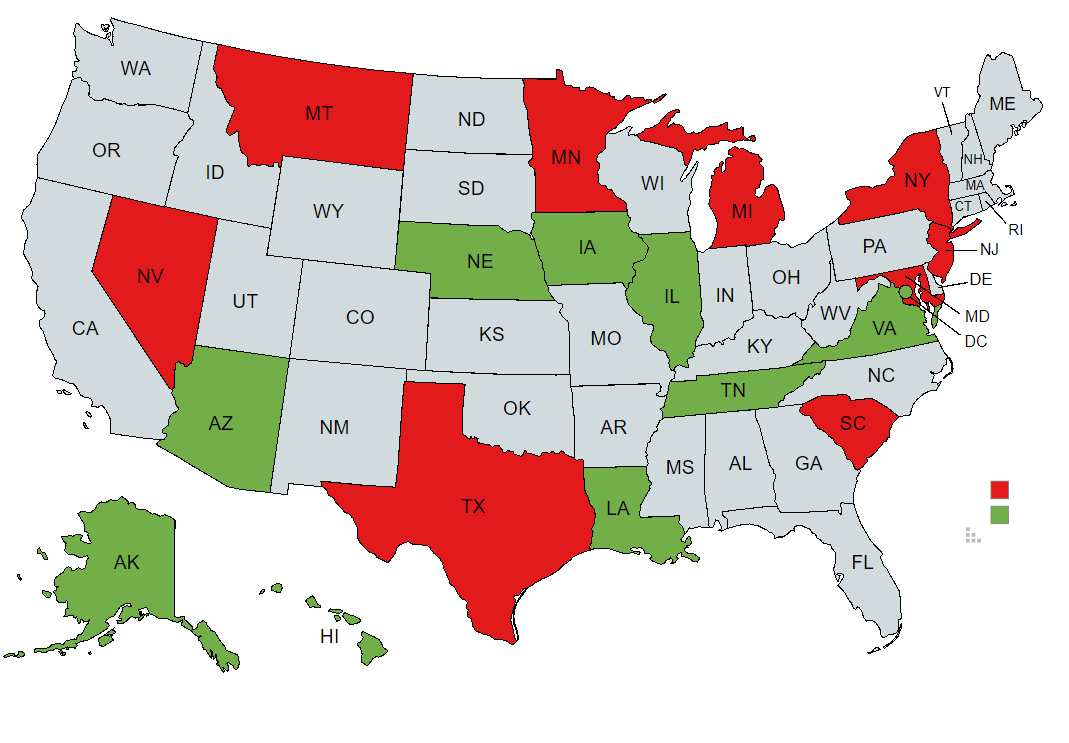
</div>

---
## Area Code Categorical

When it comes to area code, we come accross an interesting situation. As shown below, this data sheet has three area codes, with all of them being located within california. This implies this specific company primarily conducts its business in california, while a failry large amount of customers have moved to another state. This could lead to an interesting conclusion, as its possbile that moving to another state could cause a customer to churn, as there could be cheaper / more reliable service options within the new living area. California (residing in grey coloring) has a 'middle of the pack' churn rate above.

- 415 - San Fransisco
- 510 - Oakland
- 408 - San Jose

In [16]:
df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

Let's check out churn rate per these three area codes.

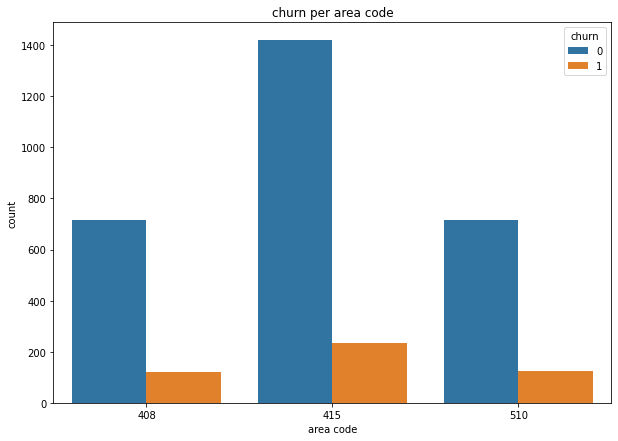

In [17]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(data = df, x = 'area code', hue = 'churn')
ax.set_title('churn per area code')
plt.show();

as we can see, 415 (San Fransisco) has the highest total amount of customers, with 1655 in total. An interesting thing to note is that even though 415 has significantly more customers than the other 2, the churn rate is about 15% for all of them.

In [18]:
area_percent(df, 415)

'out of 1655 cutomers in the 415 area code (San Fransisco), 236 (14.26%) have churned, 1419 have not'

In [19]:
area_percent(df, 510)

'out of 840 cutomers in the 510 area code (Oakland), 125 (14.88%) have churned, 715 have not'

In [20]:
area_percent(df,408)

'out of 838 cutomers in the 408 area code (San Jose), 122 (14.56%) have churned, 716 have not'

---
## International Plan Categorical

In [21]:
df['international plan'].value_counts()

international plan
0    3010
1     323
Name: count, dtype: int64

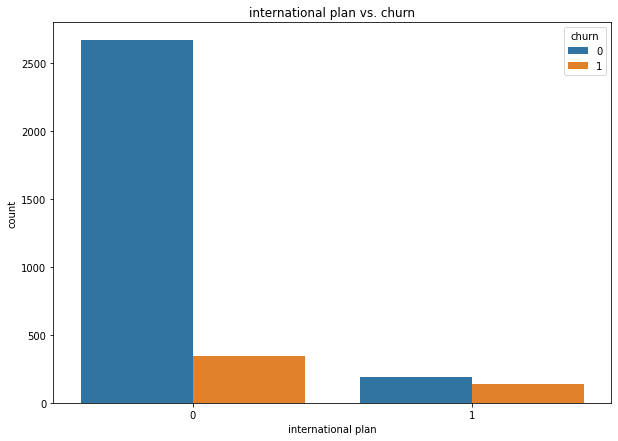

In [22]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(data = df, x = 'international plan', hue = 'churn')
ax.set_title('international plan vs. churn')
plt.show();

In [23]:
inter_percent(df, 1)

'out of 323 that do have an international plan, 137 (42.41%) churned'

In [24]:
inter_percent(df, 0)

'out of 3010 that do not have an international plan, 346 (11.5%) churned'

Above we can see that a mojority of customers dont have an international plan, and the ones that do, 42% of them end up churning. This may be a sign that international plans are either over priced, not providing adequate service quality or both.

---
## Voicemail Plan Categorical

In [25]:
df['voice mail plan'].value_counts()

voice mail plan
0    2411
1     922
Name: count, dtype: int64

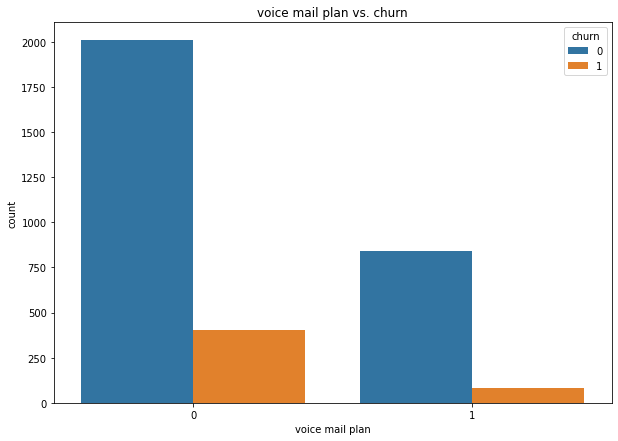

In [26]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(data = df, x = 'voice mail plan', hue = 'churn')
ax.set_title('voice mail plan vs. churn')
plt.show();

In [27]:
voice_percent(df, 1)

'out of 922 that do have a voice mail plan, 80 (8.68%) churned'

In [28]:
voice_percent(df, 0)

'out of 2411 that do not have a voice mail plan, 403 (16.72%) churned'

## Numeric data

Let's create a dataframe with just numeric data to make it easier to look into these entries.

In [29]:
numeric_data = ['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
      'total night calls', 'total night charge', 'total intl minutes',
      'total intl calls', 'total intl charge', 'customer service calls']

categorical_data = ['state', 'area code', 'international plan', 'voice mail plan']

In [30]:
df_numeric = df.drop(categorical_data, axis = 1)

In [31]:
df_categoric = df.drop(numeric_data, axis = 1)

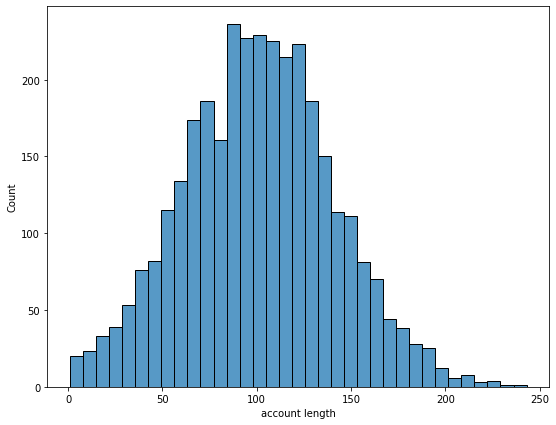

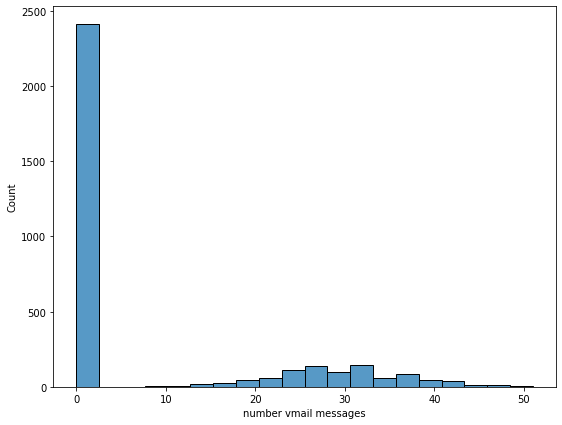

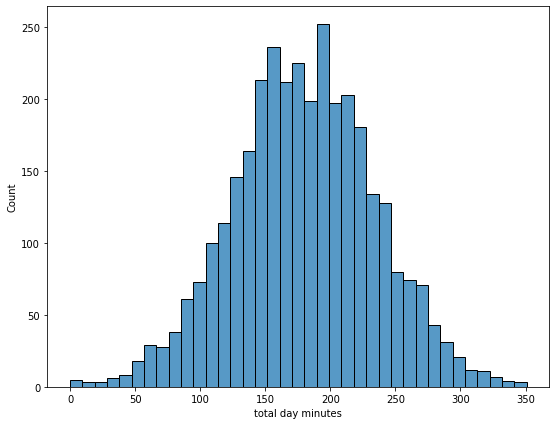

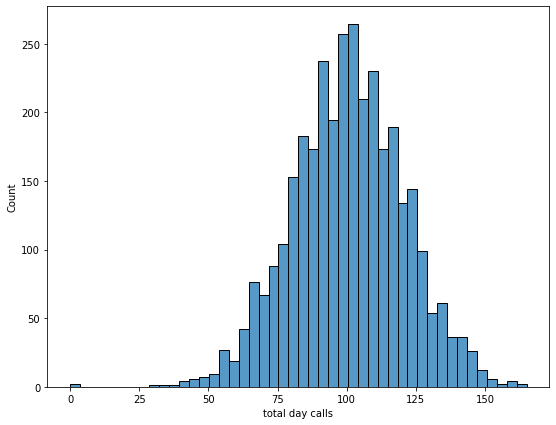

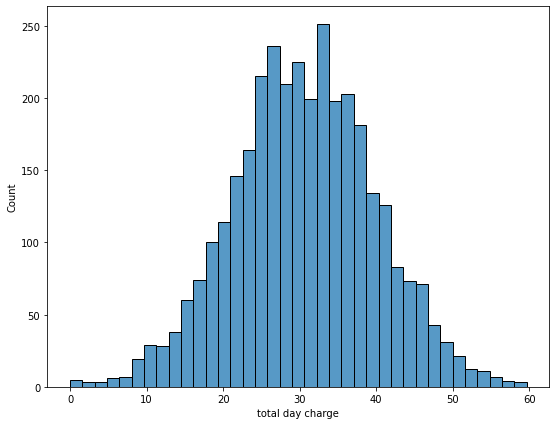

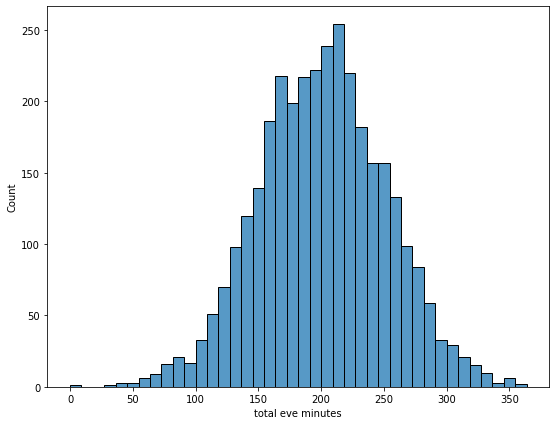

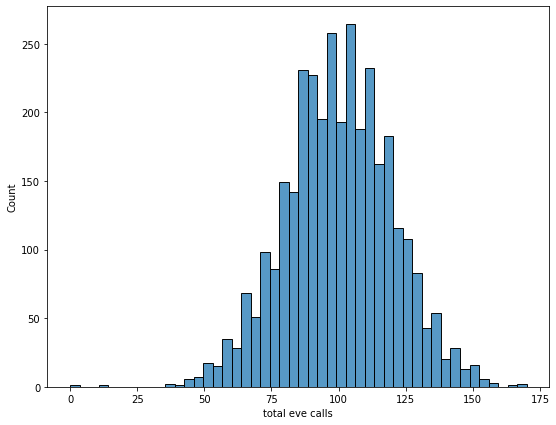

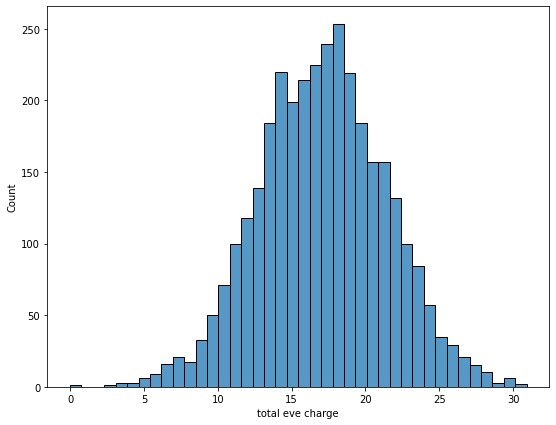

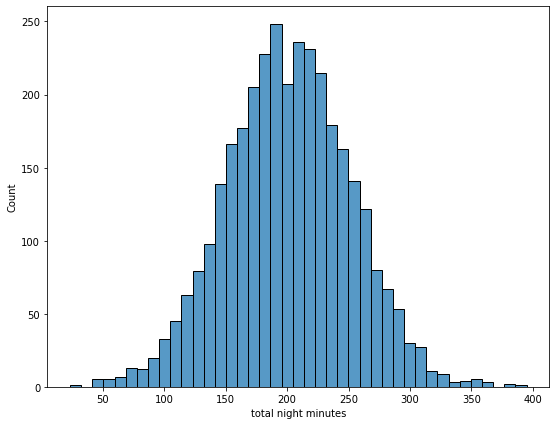

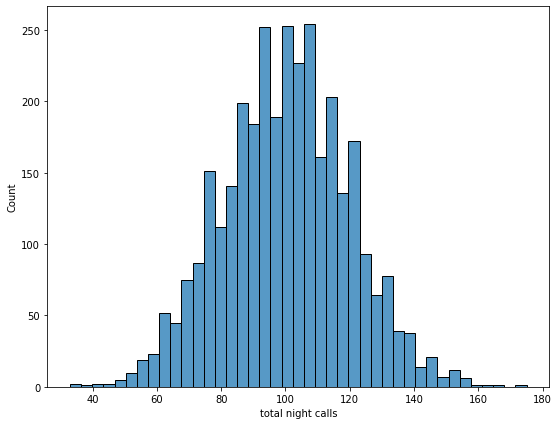

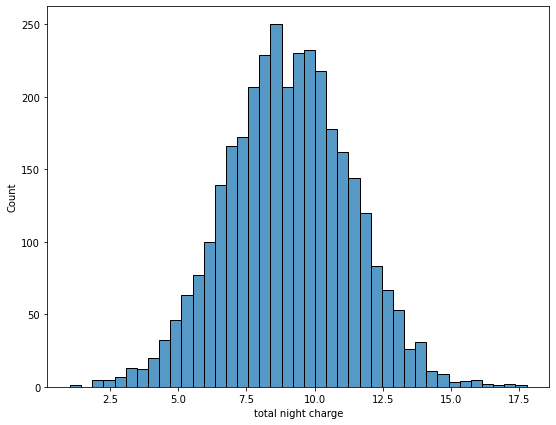

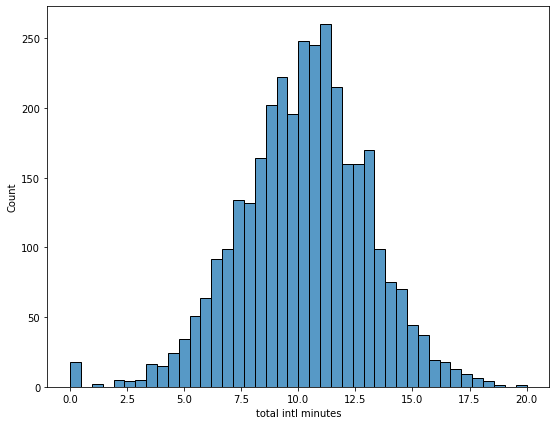

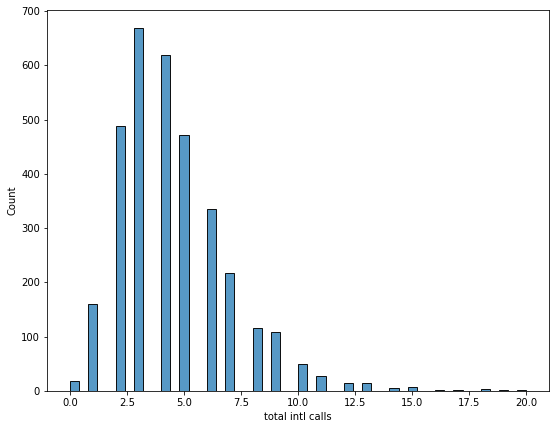

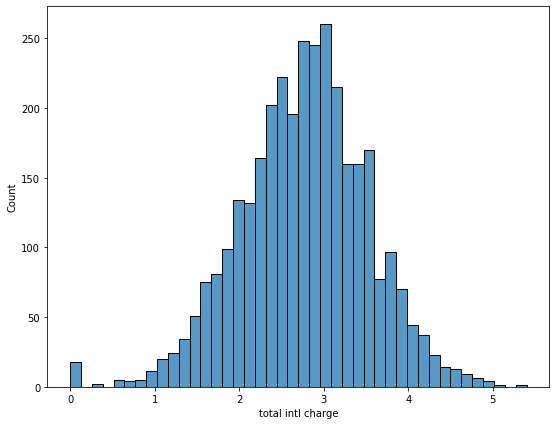

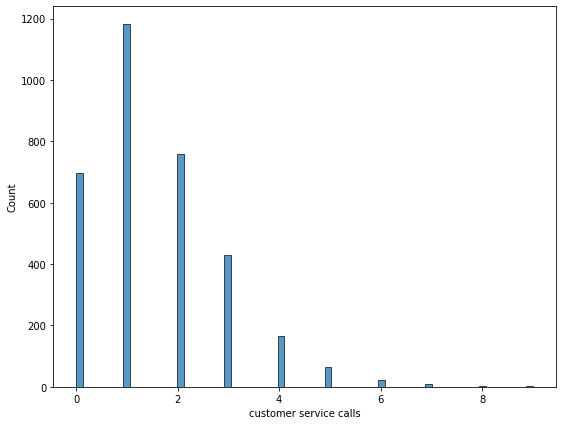

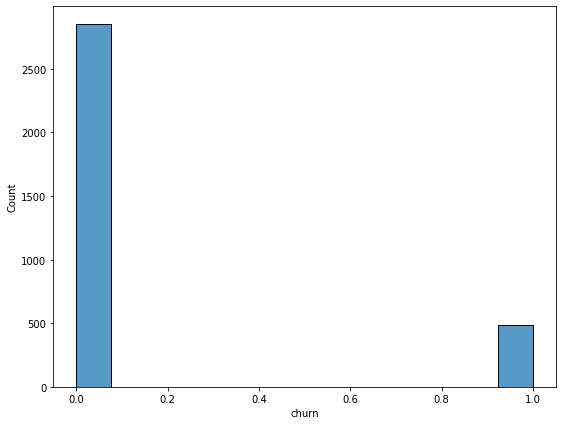

In [32]:
for i in df_numeric:
    fig, ax = plt.subplots(figsize = (9,7))
    sns.histplot(df[i])

## Breakdown

This here is just a simple breakdown of each graph shown above.

In [33]:
print(get_avgs('account length'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('number vmail messages'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total day minutes'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total day calls'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total day charge'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total eve minutes'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total eve calls'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total eve charge'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total night minutes'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total night calls'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total night charge'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total intl minutes'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total intl calls'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total intl charge'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('customer service calls'))

101.06 is the average amount of account length, with 1 being the minimum and 243 being the maximum
------------------------------------------------------------------------------------------
8.1 is the average amount of number vmail messages, with 0 being the minimum and 51 being the maximum
------------------------------------------------------------------------------------------
179.78 is the average amount of total day minutes, with 0.0 being the minimum and 350.8 being the maximum
------------------------------------------------------------------------------------------
100.44 is the average amount of total day calls, with 0 being the minimum and 165 being the maximum
------------------------------------------------------------------------------------------
30.56 is the average amount of total day charge, with 0.0 being the minimum and 59.64 being the maximum
------------------------------------------------------------------------------------------
200.98 is the average amount of to

# Model Building and Analysis

## OHE
Our first step will be to turn all categorical data into `one-hot encoded` data, which simply means it splits the data into new columns where 1 = True and 0 = False, allowing for classification models to work properly. An example showcased below is for the `state` column. Before it was simply stating what state the customer is in, but now every entry has a specific spot for each state, with only the correct state per customer having a 1 in its place.

In [34]:
ohe_df = pd.get_dummies(df, columns = categorical_data, drop_first = True, dtype = int)

In [35]:
ohe_df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_1,voice mail plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


In [36]:
ohe_df.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA',
       'state_WI',

## Train Test Split 

In [37]:
seed = 13
y = ohe_df['churn']
y = list(y)
x = ohe_df.drop('churn', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed)

## Scaling

In [38]:
scaler = MinMaxScaler()
ohe_df_scaled = ohe_df.copy()
def scaling_func(df, col):
    df = df
    return scaler.fit_transform(df[col].values.reshape(-1,1))

for i in ohe_df.select_dtypes(include=[np.number]).columns:
    ohe_df[i] = scaling_func(ohe_df, i)
ohe_df.head()


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_1,voice mail plan_1
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Model #1

Our first model will be a logistic regression model. This model will be used as a baseline for other models to compare against to see if they are improved over this one. This model will contain only the base scaling and OHE changes so that we can alter subsequent iterations of the model. 

In [39]:
lr = LogisticRegression(C=1e12, solver='liblinear')
model_log = lr.fit(x_train, y_train)
y_lr_pred_train = lr.predict(x_train)

In [40]:
train_resids = np.abs(y_train - y_lr_pred_train)

In [41]:
print(pd.Series(train_resids, name = "Residuals (counts)").value_counts())
print('-------------------------')
print(pd.Series(train_resids, name = "Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    2175
1     324
Name: count, dtype: int64
-------------------------
Residuals (proportions)
0    0.870348
1    0.129652
Name: proportion, dtype: float64


This model is doing pretty well, being about 87% correct on training data. Now we can use this on the test data to see how it fairs with unseen data.

In [42]:
y_lr_pred_test = lr.predict(x_test)

test_residuals = np.abs(y_test - y_lr_pred_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print('-------------------------')
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    709
1    125
Name: count, dtype: int64
-------------------------
Residuals (proportions)
0    0.85012
1    0.14988
Name: proportion, dtype: float64


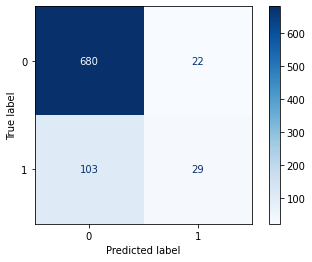

In [43]:
cf = confusion_matrix(y_test, y_lr_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

The confusion matrix above shows that it predicts true negatives really well, but does have a higher then desirable false negative rate.This model also tested failry well, being about 85% correct on training data. While this is good, we can try altering a few things and even try different models to see whats the best fit.

## SMOTE

Smote balances the minority class (churn) with the majority class (no churn) to help with over fitting. While the test above did failry well, this can help it function even better.

In [44]:
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

Now let's run the above model again to see if we get an improvement 

In [45]:
model_log_re = lr.fit(x_train_resampled, y_train_resampled)
y_lr_pred_train_re = lr.predict(x_train_resampled)
train_resids_re = np.abs(y_train_resampled - y_lr_pred_train_re)

In [46]:
print(pd.Series(train_resids_re, name = "Residuals (counts)").value_counts())
print('-------------------------')
print(pd.Series(train_resids_re, name = "Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    3917
1     379
Name: count, dtype: int64
-------------------------
Residuals (proportions)
0    0.911778
1    0.088222
Name: proportion, dtype: float64


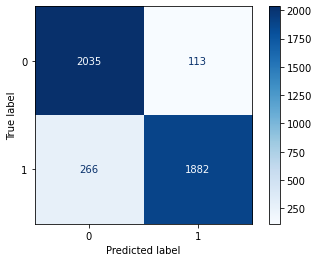

In [47]:
cf = confusion_matrix(y_train_resampled, y_lr_pred_train_re)
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

The model with smote is about 6% better. While this isn't to large of an increase, the amount of time and effort to get that increase is very small, so the value seems to be worth it. 

## Decision Tree

In [48]:
dt = DecisionTreeClassifier(random_state = seed)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=13)

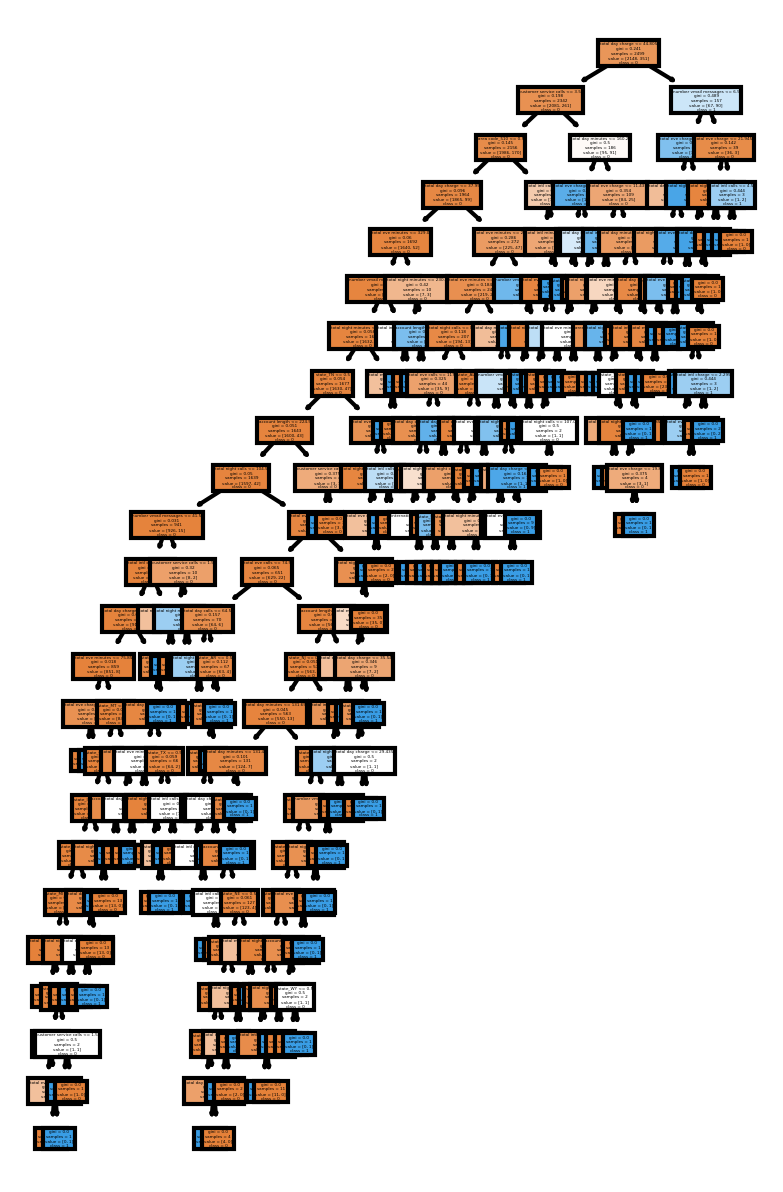

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (3,5), dpi = 300)

tree.plot_tree(dt,
              feature_names = ohe_df.columns,
              class_names = np.unique(y).astype('str'),
              filled = True)
plt.show();

As you can see, this decision tree is extremely large, and also impossible to read. Let's take a few metrics from this tree just to see how it performed, then we'll clean it up a little by limiting it.

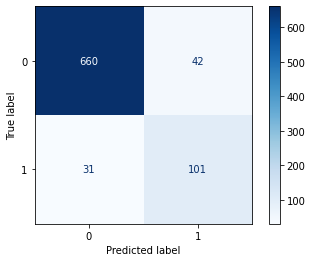

In [50]:
y_pred_dt = dt.predict(x_test)
cf = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

In [51]:
print('accuracy :', accuracy_score(y_test, y_pred_dt))

accuracy : 0.9124700239808153


In [52]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8526612276612276

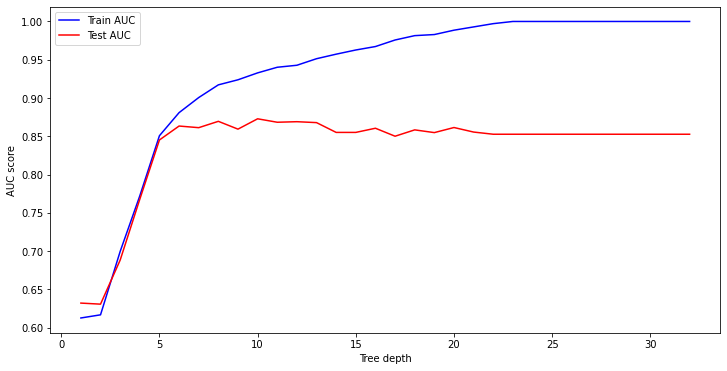

In [53]:
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth = max_depth, random_state= seed)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

understanding the graph:
- training error decreases with increasing tree depth - clear sign of overfitting
- test error decreases after depth = 3
- training and test errors decrease rapidly between the depths of 2 and 5

5 appears to be the best tree depth

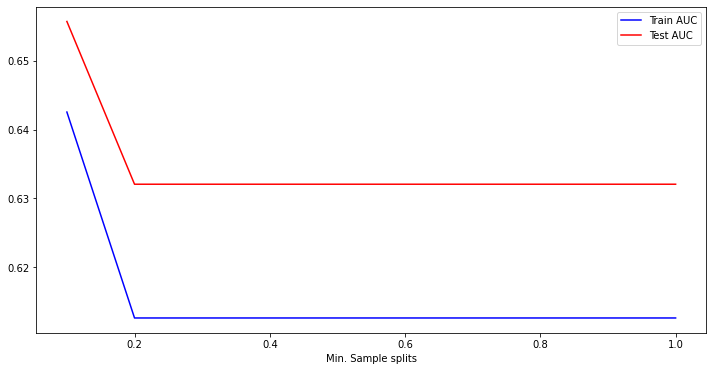

In [54]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = seed)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

Understanding the graph:
- both stabalize as 0.2

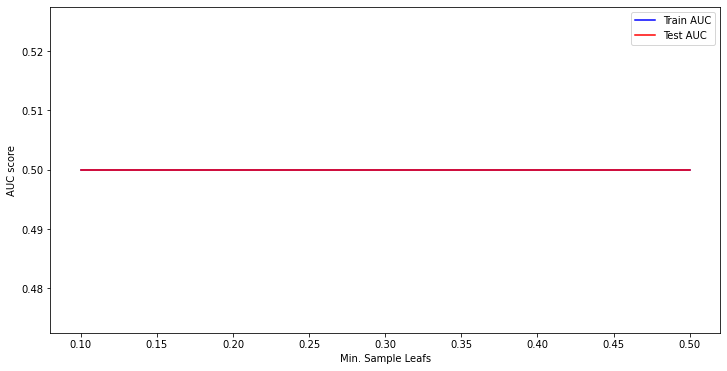

In [55]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf, random_state = seed)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

Understanding the graph:
- min. sample leafs appear to not have an effect 

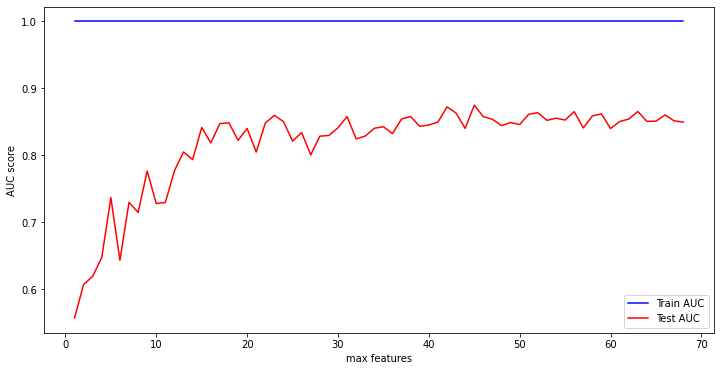

In [57]:
max_features = list(range(1, x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features = max_feature, random_state = seed)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

Understanding the graph:
- no clear effect on training dataset, flat AUC
- highets test auc seen at 45

In [59]:
dt = DecisionTreeClassifier(max_features = 45,
                           max_depth = 5,
                           min_samples_split = 0.2, 
                           random_state = seed)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7293123543123543

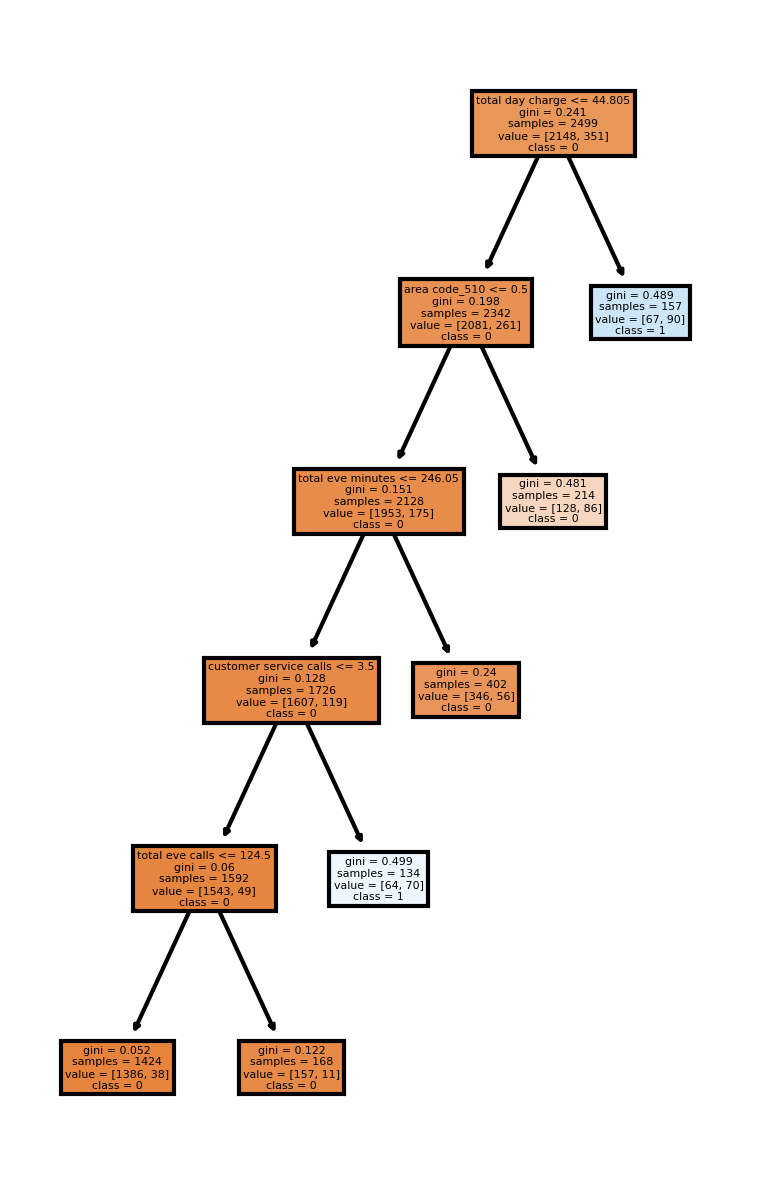

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (3,5), dpi = 300)

tree.plot_tree(dt,
              feature_names = ohe_df.columns,
              class_names = np.unique(y).astype('str'),
              filled = True)
plt.show();

This model actually performed worse. we will be sticking with the base decision tree classifier for this model selection.